In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('laptops 2.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [5]:
# EXPLORING DATA
df.columns


Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [6]:
df.Brand.value_counts()

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64

In [7]:
df.Status.value_counts()

New            1498
Refurbished     662
Name: Status, dtype: int64

In [8]:
df['Storage type'].value_counts()

SSD     2062
eMMC      56
Name: Storage type, dtype: int64

In [9]:
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [10]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split 

In [11]:
df = df.dropna()
df['Final Price']=df['Final Price'].astype(int)
meanp = df['Final Price'].mean()
minp = df['Final Price'].min()
maxp = df['Final Price'].max()
print('mean price: ',meanp, '\nmin price: ', minp, '\nmax price: ',maxp)

<ipython-input-11-306260004d7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final Price']=df['Final Price'].astype(int)


mean price:  1960.1882202304737 
min price:  477 
max price:  7150


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, utils
label = preprocessing.LabelEncoder()
df.Screen = label.fit_transform(df.Screen)

<ipython-input-12-2782ac4211c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Screen = label.fit_transform(df.Screen)


In [13]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df, test_size = 0.2, random_state=1)
independent = ['Brand','Status','Model','CPU','RAM','Storage','Storage type','GPU','Screen','Touch']
y_train = df_train['Final Price']

(array([[10.,  0.,  0.,  0.],
        [ 2.,  3.,  3.,  3.]]),
 array([1.00000e+00, 1.78825e+03, 3.57550e+03, 5.36275e+03, 7.15000e+03]),
 <a list of 2 BarContainer objects>)

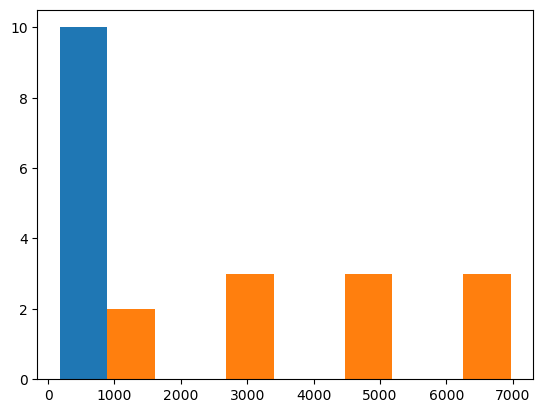

In [14]:
# visualising data features
import matplotlib.pyplot as plt
price_hist = np.histogram(df_train['Final Price'])
plt.hist(price_hist, bins=4)

In [35]:
dict_train = df_train[independent].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dict_train)
x_train = dv.transform(dict_train)
x_train[0]
dv.get_feature_names_out()

array(['Brand=Acer', 'Brand=Apple', 'Brand=Asus', 'Brand=Deep Gaming',
       'Brand=Dell', 'Brand=Gigabyte', 'Brand=HP', 'Brand=LG',
       'Brand=Lenovo', 'Brand=MSI', 'Brand=Medion', 'Brand=Microsoft',
       'Brand=Millenium', 'Brand=PcCom', 'Brand=Razer', 'Brand=Samsung',
       'CPU=AMD Radeon 9', 'CPU=AMD Ryzen 5', 'CPU=AMD Ryzen 7',
       'CPU=AMD Ryzen 9', 'CPU=Intel Core i5', 'CPU=Intel Core i7',
       'CPU=Intel Core i9', 'CPU=Intel Evo Core i7',
       'CPU=Intel Evo Core i9', 'GPU=610 M', 'GPU=A 370M', 'GPU=A 730M',
       'GPU=GTX 1050', 'GPU=GTX 1070', 'GPU=GTX 1650', 'GPU=GTX 1660',
       'GPU=MX 130', 'GPU=MX 330', 'GPU=MX 450', 'GPU=MX 550',
       'GPU=P 500', 'GPU=RTX 2050', 'GPU=RTX 2060', 'GPU=RTX 2070',
       'GPU=RTX 2080', 'GPU=RTX 3000', 'GPU=RTX 3050', 'GPU=RTX 3060',
       'GPU=RTX 3070', 'GPU=RTX 3080', 'GPU=RTX 4050', 'GPU=RTX 4060',
       'GPU=RTX 4070', 'GPU=RTX 4080', 'GPU=RTX 4090', 'GPU=RTX A1000',
       'GPU=RTX A2000', 'GPU=RTX A3000', 'GPU=R

In [16]:
model = LogisticRegression(solver='liblinear',random_state = 1)

In [17]:
df.dtypes

Laptop          object
Status          object
Brand           object
Model           object
CPU             object
RAM              int64
Storage          int64
Storage type    object
GPU             object
Screen           int32
Touch           object
Final Price      int32
dtype: object

In [18]:
# model.fit(x_train, y_train)

In [19]:
model.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [33]:
model.coef_[0]
len(model.coef_[0])

139

In [21]:
model.intercept_[0]

0.06268619251309533

In [26]:
# data Validation
y_val = df_val['Final Price']

In [36]:
dict_val = df_val[independent].to_dict(orient='records')
x_val = dv.transform(dict_val)
len(x_val)

157

In [39]:
y_pred = model.predict_proba(x_val)
y_pred[:,1]

array([2.60603255e-07, 7.27258238e-08, 5.99119895e-05, 1.02675238e-08,
       2.24778663e-09, 8.74359705e-05, 5.93534257e-04, 9.70863854e-05,
       1.14018908e-04, 1.22194807e-04, 1.73920696e-08, 2.15282895e-07,
       2.86907679e-07, 6.70675255e-05, 5.53258959e-05, 5.28274497e-05,
       8.11159427e-16, 1.45548050e-05, 1.35605383e-04, 1.49565155e-04,
       8.23906388e-05, 2.42653509e-04, 8.78204905e-05, 8.32686654e-05,
       1.71126552e-07, 1.15615994e-03, 2.88711257e-08, 1.05442793e-16,
       8.45312465e-04, 1.07475529e-09, 7.26740669e-06, 1.58097176e-04,
       1.24956775e-04, 1.02604896e-15, 1.20771366e-04, 5.72383524e-09,
       1.47648047e-04, 8.24199607e-05, 2.86901047e-07, 9.16164163e-05,
       1.58442739e-08, 1.47116582e-04, 8.85892118e-08, 4.46925170e-04,
       4.01796164e-05, 7.41226424e-04, 1.16644608e-05, 6.55318909e-05,
       2.36436914e-04, 4.82452398e-08, 7.77254878e-05, 5.02392737e-05,
       6.08481102e-05, 4.45567923e-04, 1.20004110e-08, 1.84073902e-08,
      

In [50]:
coeff = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
coeff

{'Brand=Acer': -0.043,
 'Brand=Apple': -0.001,
 'Brand=Asus': 0.588,
 'Brand=Deep Gaming': -0.0,
 'Brand=Dell': -0.02,
 'Brand=Gigabyte': -0.029,
 'Brand=HP': -0.172,
 'Brand=LG': -0.001,
 'Brand=Lenovo': -0.137,
 'Brand=MSI': -0.075,
 'Brand=Medion': -0.037,
 'Brand=Microsoft': -0.0,
 'Brand=Millenium': -0.001,
 'Brand=PcCom': -0.004,
 'Brand=Razer': -0.006,
 'Brand=Samsung': -0.0,
 'CPU=AMD Radeon 9': -0.0,
 'CPU=AMD Ryzen 5': 0.533,
 'CPU=AMD Ryzen 7': -0.09,
 'CPU=AMD Ryzen 9': -0.007,
 'CPU=Intel Core i5': -0.245,
 'CPU=Intel Core i7': -0.12,
 'CPU=Intel Core i9': -0.007,
 'CPU=Intel Evo Core i7': -0.001,
 'CPU=Intel Evo Core i9': -0.0,
 'GPU=610 M': 0.754,
 'GPU=A 370M': -0.0,
 'GPU=A 730M': -0.0,
 'GPU=GTX 1050': -0.011,
 'GPU=GTX 1070': -0.0,
 'GPU=GTX 1650': -0.13,
 'GPU=GTX 1660': -0.04,
 'GPU=MX 130': -0.014,
 'GPU=MX 330': -0.06,
 'GPU=MX 450': -0.001,
 'GPU=MX 550': -0.019,
 'GPU=P 500': -0.011,
 'GPU=RTX 2050': -0.033,
 'GPU=RTX 2060': -0.005,
 'GPU=RTX 2070': -0.004,
 'G

In [97]:
x_test = df_test[independent]
y_test = df_test['Final Price']
x_customer = x_test.to_dict(orient = 'records')[0]
x_customer = dv.transform([x_customer])
y_customer_pred = model.predict(x_customer)[0]

In [98]:
y_customer = y_test.head(1).values[0]

In [99]:
diff = y_customer - y_customer_pred

In [100]:
diff

360